In [ ]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 1.3MB/s 
     |████████████████████████████████| 6.8MB 49.2MB/s 
     |████████████████████████████████| 983kB 37.3MB/s 
     |████████████████████████████████| 266kB 49.1MB/s 
     |████████████████████████████████| 1.3MB 49.0MB/s 
     |████████████████████████████████| 1.2MB 45.3MB/s 
     |████████████████████████████████| 471kB 53.1MB/s 
     |████████████████████████████████| 2.9MB 51.4MB/s 
     |████████████████████████████████| 890kB 57.7MB/s 
  Created wheel for ktrain: filename=ktrain-0.25.3-cp36-none-any.whl size=25276312 sha256=26e5efda50c77a9680e0cb263097958227db8f1695d2267dade538641840e07c
  Stored in directory: /root/.cache/pip/wheels/86/cd/9c/ad53b98a3eccf4ddeddccfce99d353781f206a1ac4287ca721
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993194 sha256=ead5c93571de949ad17ce7592c077db74830f51f30e07804e22ad106e7b66ea4
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d4

In [ ]:
import ktrain
from ktrain import text
import pandas as pd
import numpy as np
from sklearn.utils import shuffle, resample

## Load the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
news = pd.read_excel("/content/drive/MyDrive/Masterarbeit/Crawler/data/FinalDataset/CleanData_FinalDataset_ForModel_V5.xlsx", index_col=0)

In [ ]:
# Get the same train and test data
def split_df_in_train_test(df):
    df = df.reset_index()
    split_point = int(np.round(df.shape[0]) * 0.8)
    df_train = df.loc[:split_point-1,:]
    df_test = df.loc[split_point:,:]
    return df_train, df_test

In [ ]:
n_samples = 6000

In [ ]:
left_FE = resample(shuffle(news[(news["label"]=="links") & (news.maintext.str.split().str.len()<512)], random_state=42), \
         random_state=42, n_samples=n_samples)
leanLeft_FE = resample(shuffle(news[(news["label"]=="halbLinks") & (news.maintext.str.split().str.len()<512)], random_state=42), \
         random_state=42, n_samples=n_samples)
center_FE = resample(shuffle(news[(news["label"]=="central") & (news.maintext.str.split().str.len()<512)], random_state=42), \
         random_state=42, n_samples=n_samples)
leanRight_FE = resample(shuffle(news[(news["label"]=="halbRechts") & (news.maintext.str.split().str.len()<512)], random_state=42), \
         random_state=42, n_samples=n_samples)
right_FE = resample(shuffle(news[(news["label"]=="rechts") & (news.maintext.str.split().str.len()<512)], random_state=42), \
         random_state=42, n_samples=n_samples)

In [ ]:
train = pd.concat([split_df_in_train_test(left_FE)[0], \
    split_df_in_train_test(leanLeft_FE)[0], \
    split_df_in_train_test(center_FE)[0], \
    split_df_in_train_test(leanRight_FE)[0], \
    split_df_in_train_test(right_FE)[0]])

In [ ]:
test =  pd.concat([split_df_in_train_test(left_FE)[1], \
    split_df_in_train_test(leanLeft_FE)[1], \
    split_df_in_train_test(center_FE)[1], \
    split_df_in_train_test(leanRight_FE)[1], \
    split_df_in_train_test(right_FE)[1]])

In [ ]:
x_train = train["maintext"].to_list()
y_train = train["label"].to_list()
x_test = test["maintext"].to_list()
y_test = test["label"].to_list()

In [ ]:
class_names = list(train["label"].unique())

## Build the model

In [ ]:
model_name = "T-Systems-onsite/german-roberta-sentence-transformer-v2"

In [ ]:
t = text.Transformer(model_name, maxlen=512, classes= class_names)

/usr/local/lib/python3.6/dist-packages/ktrain/text/preprocessor.py:414: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn('The class_names argument is replacing the classes argument. Please update your code.')


In [ ]:
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)

preprocessing train...
language: de
train sequence lengths:
	mean : 223
	95percentile : 470
	99percentile : 503


/usr/local/lib/python3.6/dist-packages/ktrain/utils.py:589: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: de
test sequence lengths:
	mean : 223
	95percentile : 471
	99percentile : 503


In [ ]:
trn.x

array([[[     0,  50723, 173865, ...,     33,     72,      2],
        [     1,      1,      1, ...,      1,      1,      1],
        [     0,      0,      0, ...,      0,      0,      0]],

       [[     0,    360,   8186, ..., 227637,    165,      2],
        [     1,      1,      1, ...,      1,      1,      1],
        [     0,      0,      0, ...,      0,      0,      0]],

       [[     0,  13791,      9, ...,      1,      1,      1],
        [     1,      1,      1, ...,      0,      0,      0],
        [     0,      0,      0, ...,      0,      0,      0]],

       ...,

       [[     0,   1310,   7911, ...,      1,      1,      1],
        [     1,      1,      1, ...,      0,      0,      0],
        [     0,      0,      0, ...,      0,      0,      0]],

       [[     0,   3370,  79706, ...,      1,      1,      1],
        [     1,      1,      1, ...,      0,      0,      0],
        [     0,      0,      0, ...,      0,      0,      0]],

       [[     0,  95231,  77185,

In [ ]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

404 Client Error: Not Found for url: https://huggingface.co/T-Systems-onsite/german-roberta-sentence-transformer-v2/resolve/main/tf_model.h5


In [ ]:
model.loss

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
4000/4000 [==============================] - 1309s 323ms/step - loss: 6.1056 - accuracy: 0.2296


done.
Visually inspect loss plot and select learning rate associated with falling loss


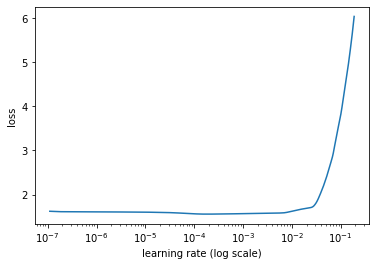

In [ ]:
learner.lr_find(show_plot=True)

In [ ]:
optimal_lr = learner.lr_estimate()[1]

In [ ]:
print(optimal_lr)

1.8675843602977692e-05


In [ ]:
learner.fit(0.00001, 10)

Epoch 1/10
4000/4000 [==============================] - 3814s 949ms/step - loss: 1.1499 - accuracy: 0.5260 - val_loss: 0.6152 - val_accuracy: 0.7748
Epoch 2/10
4000/4000 [==============================] - 3800s 949ms/step - loss: 0.4677 - accuracy: 0.8356 - val_loss: 0.4277 - val_accuracy: 0.8530
Epoch 3/10
4000/4000 [==============================] - 3796s 948ms/step - loss: 0.2363 - accuracy: 0.9215 - val_loss: 0.4378 - val_accuracy: 0.8695
Epoch 4/10
4000/4000 [==============================] - 3791s 947ms/step - loss: 0.1279 - accuracy: 0.9591 - val_loss: 0.4102 - val_accuracy: 0.8893
Epoch 5/10
4000/4000 [==============================] - 3797s 948ms/step - loss: 0.0816 - accuracy: 0.9733 - val_loss: 0.4183 - val_accuracy: 0.8930
Epoch 6/10
4000/4000 [==============================] - 3807s 951ms/step - loss: 0.0621 - accuracy: 0.9809 - val_loss: 0.5282 - val_accuracy: 0.8880
Epoch 7/10
4000/4000 [==============================] - 3804s 950ms/step - loss: 0.0394 - accuracy: 0.9876

In [ ]:
learner.validate(class_names=class_names)

NameError: ignored